# Atliq Technology: Virtual internship Project by Bharath Srinivas

In [411]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [412]:
df=pd.read_csv("survey_results.csv")
df.head(3)

,respondent_id,age,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,price_range
0,R00001,30,M,Urban,Working Professional,<10L,3-4 times,Newcomer,Medium (500 ml),0 to 1,Price,Traditional,Online,Simple,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",100-150
1,R00002,46,F,Metro,Working Professional,> 35L,5-7 times,Established,Medium (500 ml),2 to 4,Quality,Exotic,Retail Store,Premium,Medium (Moderately health-conscious),Social (eg. Parties),200-250
2,R00003,41,F,Rural,Working Professional,> 35L,3-4 times,Newcomer,Medium (500 ml),2 to 4,Availability,Traditional,Retail Store,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",200-250


In [413]:
df.shape

(30010, 17)

## Data cleaning: 
### Removing duplicates

In [414]:
df.respondent_id.duplicated().sum()

np.int64(10)

In [415]:
df.drop_duplicates(subset="respondent_id",keep="first",inplace=True)

In [416]:
df.respondent_id.duplicated().sum()

np.int64(0)

###  Removing outliers

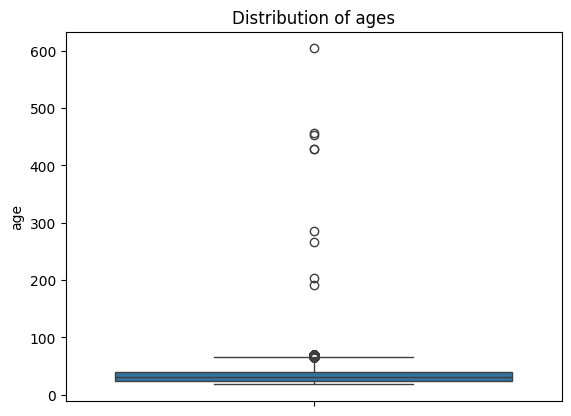

In [417]:
data = df.age
sns.boxplot(data)
plt.title("Distribution of ages")
plt.show()

In [418]:
df.age.quantile([0.25,0.75])

0.25    23.0
0.75    40.0
Name: age, dtype: float64

In [419]:
df['age'][df.age> df.age.quantile(0.999)].value_counts()

age
428    2
453    1
604    1
457    1
267    1
285    1
192    1
203    1
Name: count, dtype: int64

In [420]:
df = df[df.age< df.age.quantile(0.999)]

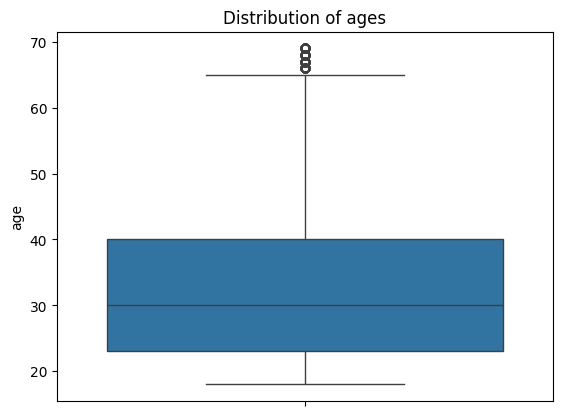

In [421]:
data = df.age
sns.boxplot(data)
plt.title("Distribution of ages")
plt.show()

### Handling duplicates

In [422]:
df.head(2)

,respondent_id,age,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,price_range
0,R00001,30,M,Urban,Working Professional,<10L,3-4 times,Newcomer,Medium (500 ml),0 to 1,Price,Traditional,Online,Simple,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",100-150
1,R00002,46,F,Metro,Working Professional,> 35L,5-7 times,Established,Medium (500 ml),2 to 4,Quality,Exotic,Retail Store,Premium,Medium (Moderately health-conscious),Social (eg. Parties),200-250


In [423]:
df.isna().sum()

respondent_id                        0
age                                  0
gender                               0
zone                                 0
occupation                           0
income_levels                     8059
consume_frequency(weekly)            8
current_brand                        0
preferable_consumption_size          0
awareness_of_other_brands            0
reasons_for_choosing_brands          0
flavor_preference                    0
purchase_channel                    10
packaging_preference                 0
health_concerns                      0
typical_consumption_situations       0
price_range                          0
dtype: int64

In [424]:
df.income_levels.value_counts()

income_levels
16L - 25L    5887
10L - 15L    5232
<10L         4602
26L - 35L    3871
> 35L        2246
Name: count, dtype: int64

In [425]:
df['income_levels'] = df['income_levels'].fillna('not reported')


In [426]:
df['consume_frequency(weekly)'].isna().sum()

np.int64(8)

In [427]:
df['consume_frequency(weekly)'].value_counts()

consume_frequency(weekly)
3-4 times    11750
5-7 times     9749
0-2 times     8390
Name: count, dtype: int64

In [428]:
df['consume_frequency(weekly)'] = df['consume_frequency(weekly)'].fillna(df['consume_frequency(weekly)'].mode()[0])

In [429]:
df['purchase_channel'] = df['purchase_channel'].fillna(df['purchase_channel'].mode()[0])

In [430]:
#fillna only works when you pas a scalar,it wont work if u pass a 
#series(just passing df.column.mode() will return a series and the fillna wont work)

In [431]:
df.isna().sum()

respondent_id                     0
age                               0
gender                            0
zone                              0
occupation                        0
income_levels                     0
consume_frequency(weekly)         0
current_brand                     0
preferable_consumption_size       0
awareness_of_other_brands         0
reasons_for_choosing_brands       0
flavor_preference                 0
purchase_channel                  0
packaging_preference              0
health_concerns                   0
typical_consumption_situations    0
price_range                       0
dtype: int64

### cleaning categorical columns

In [432]:
categorical_cols = df.select_dtypes(['object']).columns
categorical_cols

Index(['respondent_id', 'gender', 'zone', 'occupation', 'income_levels',
       'consume_frequency(weekly)', 'current_brand',
       'preferable_consumption_size', 'awareness_of_other_brands',
       'reasons_for_choosing_brands', 'flavor_preference', 'purchase_channel',
       'packaging_preference', 'health_concerns',
       'typical_consumption_situations', 'price_range'],
      dtype='object')

In [433]:
for col in categorical_cols:
    print(f"{col} : {df[col].unique()}")

respondent_id : ['R00001' 'R00002' 'R00003' ... 'R29998' 'R29999' 'R30000']
gender : ['M' 'F']
zone : ['Urban' 'Metro' 'Rural' 'Semi-Urban' 'Metor' 'urbna']
occupation : ['Working Professional' 'Student' 'Entrepreneur' 'Retired']
income_levels : ['<10L' '> 35L' '16L - 25L' 'not reported' '10L - 15L' '26L - 35L']
consume_frequency(weekly) : ['3-4 times' '5-7 times' '0-2 times']
current_brand : ['Newcomer' 'Established' 'newcomer' 'Establishd']
preferable_consumption_size : ['Medium (500 ml)' 'Large (1 L)' 'Small (250 ml)']
awareness_of_other_brands : ['0 to 1' '2 to 4' 'above 4']
reasons_for_choosing_brands : ['Price' 'Quality' 'Availability' 'Brand Reputation']
flavor_preference : ['Traditional' 'Exotic']
purchase_channel : ['Online' 'Retail Store']
packaging_preference : ['Simple' 'Premium' 'Eco-Friendly']
health_concerns : ['Medium (Moderately health-conscious)' 'Low (Not very concerned)'
 'High (Very health-conscious)']
typical_consumption_situations : ['Active (eg. Sports, gym)' 'S

In [434]:
df[df['zone']=='Metor'].shape

(4, 17)

In [435]:
df['zone'] = df['zone'].replace({
    'Metor':"Metro",
    'urbna':'Urban',
    'urban':'Urban'
})

In [436]:
df['current_brand'] = df['current_brand'].replace({
    'newcomer':'Newcomer',
    'Establishd':'Established'
})

In [437]:
df.current_brand.unique()

array(['Newcomer', 'Established'], dtype=object)

In [438]:
df.shape

(29897, 17)

In [439]:
df.zone.unique()

array(['Urban', 'Metro', 'Rural', 'Semi-Urban'], dtype=object)

In [440]:
df.current_brand.unique()

array(['Newcomer', 'Established'], dtype=object)

-------

## Feature Engineering

In [441]:
bins = [17,25,35,45,55,70,100]
labels=['18-25','26-35','36-45','46-55','56-70','70+']
df['age_group'] = pd.cut(df['age'],bins=bins,labels=labels)

In [442]:
df.drop('age',axis=1,inplace=True)

In [443]:
df.shape

(29897, 17)

In [444]:
df['consume_frequency(weekly)'] = df['consume_frequency(weekly)'].map({
    "0-2 times":1,
    "3-4 times":2,
    "5-7 times":3
})

In [445]:
df['awareness_of_other_brands']= df['awareness_of_other_brands'].map({
    "0 to 1":1,
    "2 to 4":2,
    "above 4":3
})

In [446]:
df['cf_ab_score']= round(df['awareness_of_other_brands']/(df['awareness_of_other_brands']+df['consume_frequency(weekly)']),2)

In [447]:
df.head(2)

,respondent_id,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,price_range,age_group,cf_ab_score
0,R00001,M,Urban,Working Professional,<10L,2,Newcomer,Medium (500 ml),1,Price,Traditional,Online,Simple,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",100-150,26-35,0.33
1,R00002,F,Metro,Working Professional,> 35L,3,Established,Medium (500 ml),2,Quality,Exotic,Retail Store,Premium,Medium (Moderately health-conscious),Social (eg. Parties),200-250,46-55,0.40


In [448]:
df.cf_ab_score.max()

np.float64(0.75)

In [449]:
# checking if all the values in the new column has values
df.cf_ab_score.isna().sum()

np.int64(0)

In [450]:
df['zone'] = df['zone'].map({
    "Urban":3,
    "Metro":4,
    "Rural":1,
    "Semi-Urban":2
})

In [451]:
df.income_levels.unique()

array(['<10L', '> 35L', '16L - 25L', 'not reported', '10L - 15L',
       '26L - 35L'], dtype=object)

In [452]:
df.isna().sum()

respondent_id                     0
gender                            0
zone                              0
occupation                        0
income_levels                     0
consume_frequency(weekly)         0
current_brand                     0
preferable_consumption_size       0
awareness_of_other_brands         0
reasons_for_choosing_brands       0
flavor_preference                 0
purchase_channel                  0
packaging_preference              0
health_concerns                   0
typical_consumption_situations    0
price_range                       0
age_group                         0
cf_ab_score                       0
dtype: int64

In [453]:
df['income_levels'] = df['income_levels'].map({
    '<10L':1,
    '> 35L':5,
    '16L - 25L':3,
    'not reported':0,
    '10L - 15L':2,
    '26L - 35L':4
})

In [454]:
df.isna().sum()

respondent_id                     0
gender                            0
zone                              0
occupation                        0
income_levels                     0
consume_frequency(weekly)         0
current_brand                     0
preferable_consumption_size       0
awareness_of_other_brands         0
reasons_for_choosing_brands       0
flavor_preference                 0
purchase_channel                  0
packaging_preference              0
health_concerns                   0
typical_consumption_situations    0
price_range                       0
age_group                         0
cf_ab_score                       0
dtype: int64

In [455]:
df['zas_score'] = df['income_levels'] * df['zone'] 

In [456]:
df.income_levels.isna().sum()

np.int64(0)

In [457]:
df.zas_score.isna().sum()

np.int64(0)

In [458]:
df.zone.isna().sum()

np.int64(0)

In [459]:
df.head(3)

,respondent_id,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,price_range,age_group,cf_ab_score,zas_score
0,R00001,M,3,Working Professional,1,2,Newcomer,Medium (500 ml),1,Price,Traditional,Online,Simple,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",100-150,26-35,0.33,3
1,R00002,F,4,Working Professional,5,3,Established,Medium (500 ml),2,Quality,Exotic,Retail Store,Premium,Medium (Moderately health-conscious),Social (eg. Parties),200-250,46-55,0.40,20
2,R00003,F,1,Working Professional,5,2,Newcomer,Medium (500 ml),2,Availability,Traditional,Retail Store,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",200-250,36-45,0.50,5


In [460]:
condition=((df['current_brand']!='Established') & (df['reasons_for_choosing_brands'].isin(['Price','Quality'])))

In [461]:
condition

0         True
1        False
2        False
3        False
4        False
         ...  
30005    False
30006    False
30007    False
30008    False
30009     True
Length: 29897, dtype: bool

In [462]:
df['bsi'] = condition.astype('int8')

In [463]:
df.head(3)

,respondent_id,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,price_range,age_group,cf_ab_score,zas_score,bsi
0,R00001,M,3,Working Professional,1,2,Newcomer,Medium (500 ml),1,Price,Traditional,Online,Simple,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",100-150,26-35,0.33,3,1
1,R00002,F,4,Working Professional,5,3,Established,Medium (500 ml),2,Quality,Exotic,Retail Store,Premium,Medium (Moderately health-conscious),Social (eg. Parties),200-250,46-55,0.40,20,0
2,R00003,F,1,Working Professional,5,2,Newcomer,Medium (500 ml),2,Availability,Traditional,Retail Store,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",200-250,36-45,0.50,5,0


In [464]:
pd.crosstab(index=df['age_group'],columns=df['occupation'])

occupation,Entrepreneur,Retired,Student,Working Professional
age_group,,,,
18-25,535,0,7328,2605
26-35,1826,0,697,6570
36-45,1619,0,0,4353
46-55,799,0,0,2167
56-70,212,1054,34,98


In [465]:
df.shape

(29897, 20)

In [466]:
condition = (df['age_group']=='56-70') & (df['occupation']=='Student')
df.drop(index=df.index[condition],inplace=True)

In [467]:
pd.crosstab(index=df['age_group'],columns=df['occupation'])

occupation,Entrepreneur,Retired,Student,Working Professional
age_group,,,,
18-25,535,0,7328,2605
26-35,1826,0,697,6570
36-45,1619,0,0,4353
46-55,799,0,0,2167
56-70,212,1054,0,98


In [468]:
len(df.zas_score.unique())

14

In [469]:
df.shape

(29863, 20)

In [470]:
df[df.bsi==0].shape

(20738, 20)

In [471]:
df.current_brand.unique()

array(['Newcomer', 'Established'], dtype=object)

------

In [472]:
X=df.drop(['respondent_id','price_range'],axis=1)
y=df['price_range']

In [473]:
X.head(2)

,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,age_group,cf_ab_score,zas_score,bsi
0,M,3,Working Professional,1,2,Newcomer,Medium (500 ml),1,Price,Traditional,Online,Simple,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",26-35,0.33,3,1
1,F,4,Working Professional,5,3,Established,Medium (500 ml),2,Quality,Exotic,Retail Store,Premium,Medium (Moderately health-conscious),Social (eg. Parties),46-55,0.40,20,0


In [474]:
from sklearn.model_selection import train_test_split

### Feature encoding

In [475]:
X.head(2)

,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,age_group,cf_ab_score,zas_score,bsi
0,M,3,Working Professional,1,2,Newcomer,Medium (500 ml),1,Price,Traditional,Online,Simple,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",26-35,0.33,3,1
1,F,4,Working Professional,5,3,Established,Medium (500 ml),2,Quality,Exotic,Retail Store,Premium,Medium (Moderately health-conscious),Social (eg. Parties),46-55,0.40,20,0


In [476]:
columns_to_label_encode = ['age_group','income_levels','health_concerns','preferable_consumption_size']
columns_to_one_hot_encode = ['gender','occupation','current_brand','reasons_for_choosing_brands','flavor_preference','purchase_channel','packaging_preference','typical_consumption_situations']




X = pd.get_dummies(X,columns=columns_to_one_hot_encode,drop_first=True,dtype=int)



In [477]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in columns_to_label_encode:
    X[col] = le.fit_transform(X[col])


In [478]:
y

0        100-150
1        200-250
2        200-250
3        150-200
4         50-100
          ...   
30005    150-200
30006    200-250
30007    150-200
30008    150-200
30009    150-200
Name: price_range, Length: 29863, dtype: object

In [479]:
X.head(2)

,zone,income_levels,consume_frequency(weekly),preferable_consumption_size,awareness_of_other_brands,health_concerns,age_group,cf_ab_score,zas_score,bsi,...,current_brand_Newcomer,reasons_for_choosing_brands_Brand Reputation,reasons_for_choosing_brands_Price,reasons_for_choosing_brands_Quality,flavor_preference_Traditional,purchase_channel_Retail Store,packaging_preference_Premium,packaging_preference_Simple,typical_consumption_situations_Casual (eg. At home),typical_consumption_situations_Social (eg. Parties)
0,3,1,2,1,1,2,1,0.33,3,1,...,1,0,1,0,1,0,0,1,0,0
1,4,5,3,1,2,2,3,0.40,20,0,...,0,0,0,1,0,1,1,0,0,1


In [480]:
le_y = LabelEncoder()
y = le_y.fit_transform(y)

In [481]:
y

array([0, 2, 2, ..., 1, 1, 1], shape=(29863,))

In [482]:
X.columns

Index(['zone', 'income_levels', 'consume_frequency(weekly)',
       'preferable_consumption_size', 'awareness_of_other_brands',
       'health_concerns', 'age_group', 'cf_ab_score', 'zas_score', 'bsi',
       'gender_M', 'occupation_Retired', 'occupation_Student',
       'occupation_Working Professional', 'current_brand_Newcomer',
       'reasons_for_choosing_brands_Brand Reputation',
       'reasons_for_choosing_brands_Price',
       'reasons_for_choosing_brands_Quality', 'flavor_preference_Traditional',
       'purchase_channel_Retail Store', 'packaging_preference_Premium',
       'packaging_preference_Simple',
       'typical_consumption_situations_Casual (eg. At home)',
       'typical_consumption_situations_Social (eg. Parties)'],
      dtype='object')

## Model selection

In [483]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report


In [484]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [485]:
models = {
    'gaussianNB':GaussianNB(),
    'lr':LogisticRegression(max_iter=1000),
    'svc':SVC(),
    'rfc':RandomForestClassifier(),
    'xgb':XGBClassifier(),
    'lgbm':LGBMClassifier()
}

for name,model in models.items():
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    report = classification_report(y_test,y_pred)
    print(f"Classification report for {name:}")
    print(report)

Classification report for gaussianNB
              precision    recall  f1-score   support

           0       0.49      0.27      0.34      2017
           1       0.57      0.34      0.43      2108
           2       0.71      0.89      0.79      2405
           3       0.42      0.92      0.57       936

    accuracy                           0.57      7466
   macro avg       0.55      0.60      0.53      7466
weighted avg       0.57      0.57      0.54      7466



/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:203: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights.T + intercept  # ndarray, likely C-contiguous
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:203: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights.T + intercept  # ndarray, likely C-contiguous
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:203: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights.T + intercept  # ndarray, likely C-contiguous
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:336: RuntimeWarning: divide by zero encountered in matmul
  grad[:, :n_features] = grad_pointwise.T @ X + l2_reg_strength * weights
/L

Classification report for lr
              precision    recall  f1-score   support

           0       0.75      0.76      0.76      2017
           1       0.75      0.77      0.76      2108
           2       0.90      0.90      0.90      2405
           3       0.80      0.73      0.76       936

    accuracy                           0.80      7466
   macro avg       0.80      0.79      0.79      7466
weighted avg       0.80      0.80      0.80      7466

Classification report for svc
              precision    recall  f1-score   support

           0       0.76      0.78      0.77      2017
           1       0.76      0.80      0.78      2108
           2       0.92      0.90      0.91      2405
           3       0.82      0.72      0.77       936

    accuracy                           0.82      7466
   macro avg       0.82      0.80      0.81      7466
weighted avg       0.82      0.82      0.82      7466

Classification report for rfc
              precision    recall  f1-sco

In [486]:
#let us also create a table for easier reference qith cross val score
results={}
for name,model in models.items():
    scores = cross_val_score(model,X,y,cv=5,scoring='accuracy')
    results[name] = scores.mean()



/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:203: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights.T + intercept  # ndarray, likely C-contiguous
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:203: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights.T + intercept  # ndarray, likely C-contiguous
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:203: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights.T + intercept  # ndarray, likely C-contiguous
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:336: RuntimeWarning: divide by zero encountered in matmul
  grad[:, :n_features] = grad_pointwise.T @ X + l2_reg_strength * weights
/L

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000318 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 82
[LightGBM] [Info] Number of data points in the train set: 23890, number of used features: 24
[LightGBM] [Info] Start training from score -1.346655
[LightGBM] [Info] Start training from score -1.227693
[LightGBM] [Info] Start training from score -1.125122
[LightGBM] [Info] Start training from score -2.101192
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000330 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 82
[LightGBM] [Inf

In [487]:
results_df = pd.DataFrame(list(results.items()),columns=['Model Name',"accuracy Score"])
results_df

,Model Name,accuracy Score
0,gaussianNB,0.567157
1,lr,0.796772
2,svc,0.816629
3,rfc,0.900479
4,xgb,0.925627
5,lgbm,0.924422


## ML flow model experiment tracking 

In [488]:
# models = {
#     'gaussianNB':GaussianNB(),
#     'lr':LogisticRegression(max_iter=1000),
#     'svc':SVC(),
#     'rfc':RandomForestClassifier(),
#     'xgb':XGBClassifier(),
#     'lgbm':LGBMClassifier()
# }

# import mlflow
# mlflow.set_experiment("trail experiment")
# mlflow.set_tracking_uri('http://127.0.0.1:5000')

# for name,model in models.items():
#     model.fit(X_train,y_train)
#     y_pred = model.predict(X_test)
#     report = classification_report(y_test,y_pred,output_dict=True)
    
#     with mlflow.start_run(run_name=f"{name}"):
#         mlflow.log_param('model_name',name)
#         mlflow.log_metrics({
#             'accuracy':report['accuracy'],
#             'recall_0':report['0']['recall'],
#             'recall_1':report['1']['recall'],
#             'recall_2':report['2']['recall'],
#             'recall_3':report['3']['recall'],
#             'precision_0':report['0']['precision'],
#             'precision_1':report['1']['precision'],
#             'precision_2':report['2']['precision'],
#             'precision_3':report['3']['precision'],
#             'f1_score_macro':report['macro avg']['f1-score']
            
#         })
#         if 'xgb' in name:
#             mlflow.xgboost.log_model(model,f"{name}")
#         else:
#             mlflow.sklearn.log_model(model,f"{name}")
        
    

In [489]:
X.columns

Index(['zone', 'income_levels', 'consume_frequency(weekly)',
       'preferable_consumption_size', 'awareness_of_other_brands',
       'health_concerns', 'age_group', 'cf_ab_score', 'zas_score', 'bsi',
       'gender_M', 'occupation_Retired', 'occupation_Student',
       'occupation_Working Professional', 'current_brand_Newcomer',
       'reasons_for_choosing_brands_Brand Reputation',
       'reasons_for_choosing_brands_Price',
       'reasons_for_choosing_brands_Quality', 'flavor_preference_Traditional',
       'purchase_channel_Retail Store', 'packaging_preference_Premium',
       'packaging_preference_Simple',
       'typical_consumption_situations_Casual (eg. At home)',
       'typical_consumption_situations_Social (eg. Parties)'],
      dtype='object')

In [490]:
X.shape

(29863, 24)

In [491]:
le_y.classes_

array(['100-150', '150-200', '200-250', '50-100'], dtype=object)

### Saving the model

In [492]:
from joblib import dump
xgb_clf = XGBClassifier()   
xgb_clf.fit(X_train, y_train)

label_classes = le_y.classes_.tolist()

dump(
    {
        "model": xgb_clf,                     # the FITTED estimator (not a fresh XGBClassifier())
        "features": X.columns.tolist(),
        "label_classes": label_classes
    },
    "artifacts/model_data.joblib"
)

['artifacts/model_data.joblib']